In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# women = train_data.loc[train_data.Sex == 'female']['Survived']
# rateW = sum(women)/len(women)
# print(rateW)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
y = train_data['Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Survived', 'Pclass', 'Ticket', 'Sex', 'Cabin', 'Embarked']

data_num = train_data[num_features]
data_cat = train_data[cat_features]

# x = pd.get_dummies(train_data[features])
# x_test = pd.get_dummies(test_data[features])

# EDA

/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


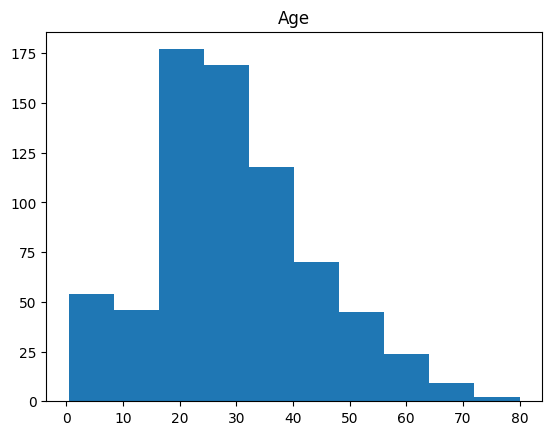

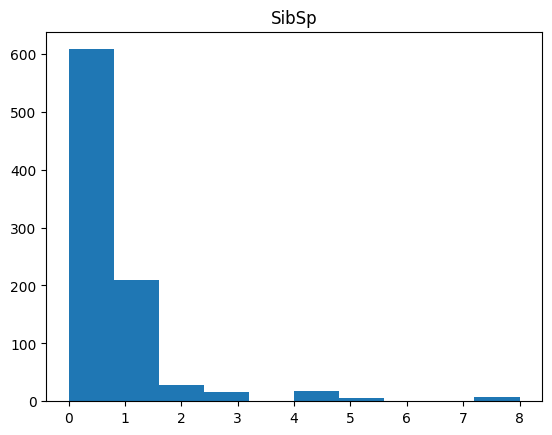

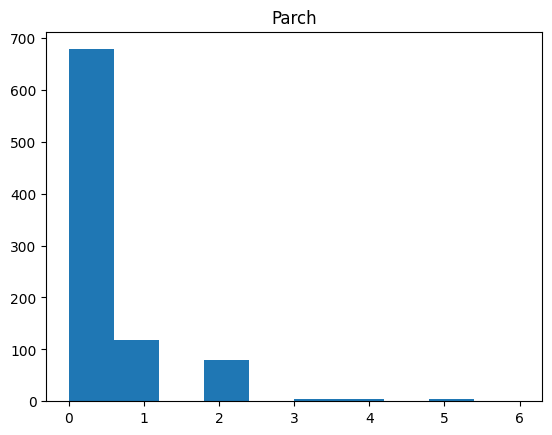

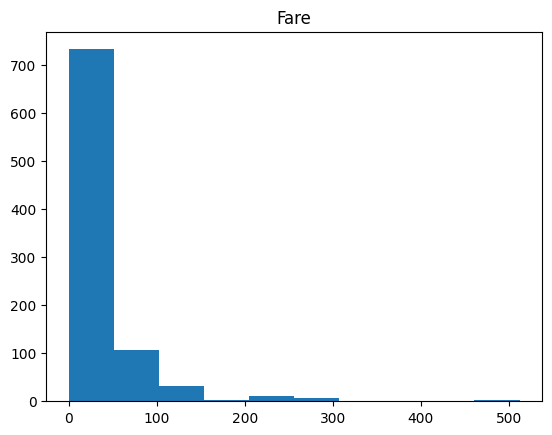

In [8]:
import matplotlib.pyplot as plt

# Plot histograms for each numeric feature
for feature in data_num.columns:
    plt.hist(data_num[feature])
    plt.title(feature)
    plt.show()

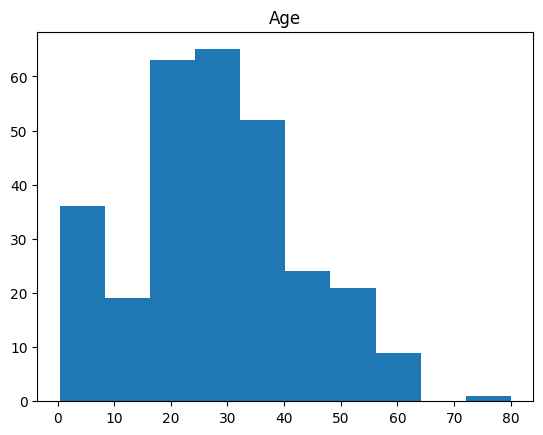

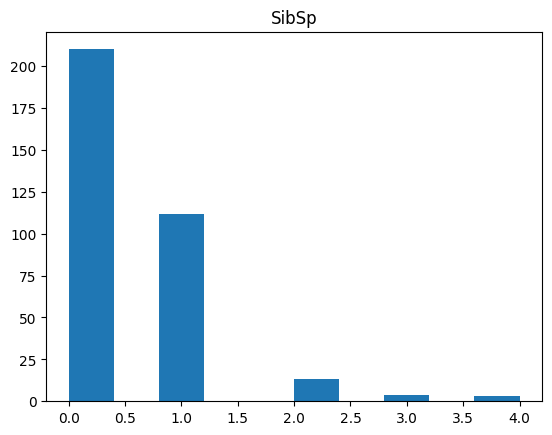

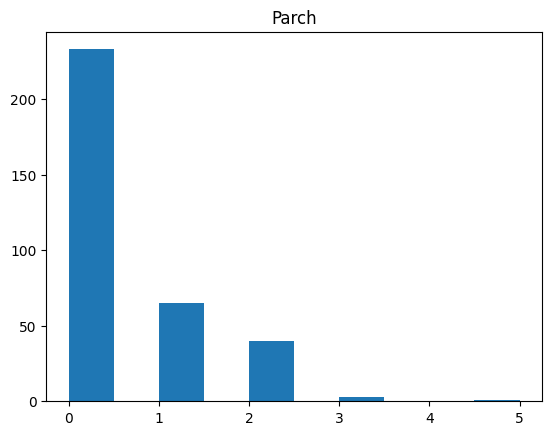

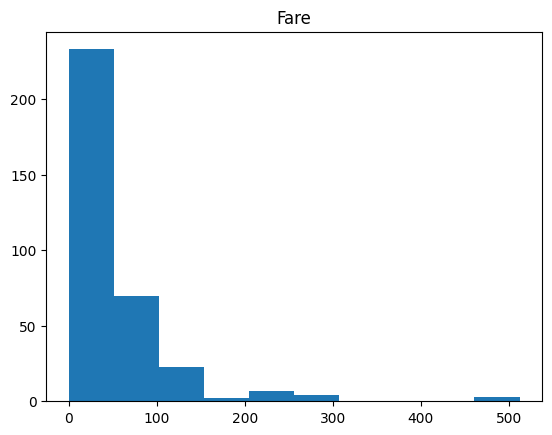

In [9]:
# Plot histograms for numerical features in cases where the passenger survived
for feature in num_features:
    plt.hist(train_data[train_data['Survived'] == 1][feature].dropna())
    plt.title(feature)
    plt.show()

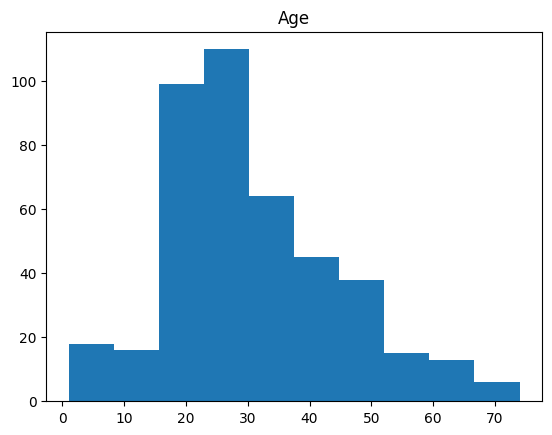

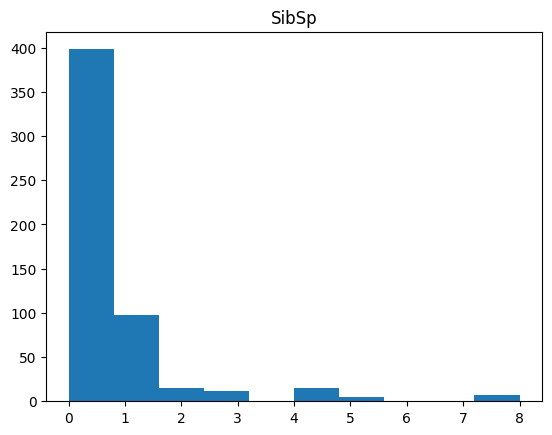

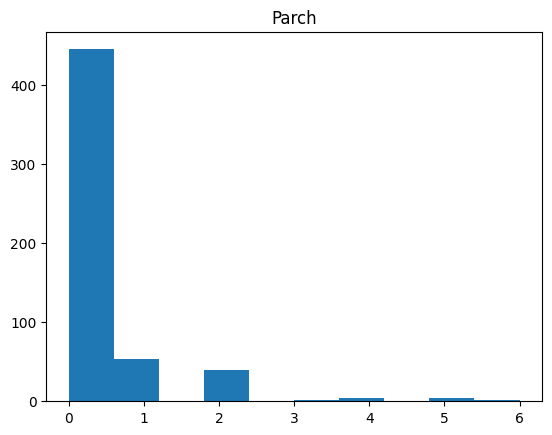

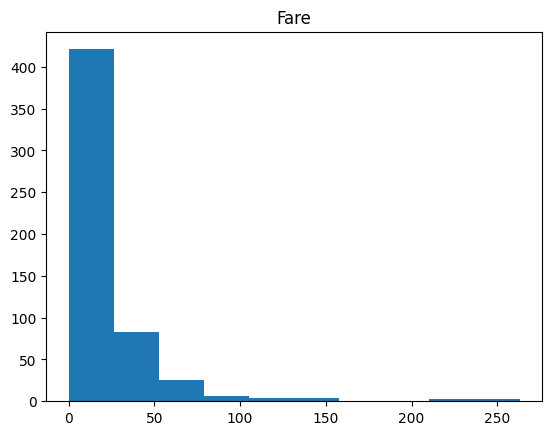

In [10]:
# Plot histograms for numerical features in cases where the passenger did not survive
for feature in num_features:
    plt.hist(train_data[train_data['Survived'] == 0][feature].dropna())
    plt.title(feature)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

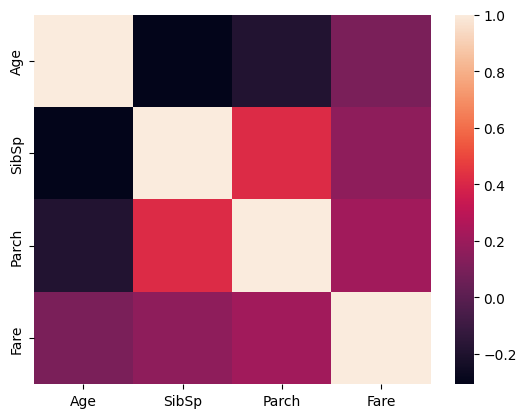

In [11]:
import seaborn as sns

# Visualize correlation
print(data_num.corr())
sns.heatmap(data_num.corr())

In [12]:
# Compare survival rate across numerical features
pd.pivot_table(train_data, index='Survived', values=num_features)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


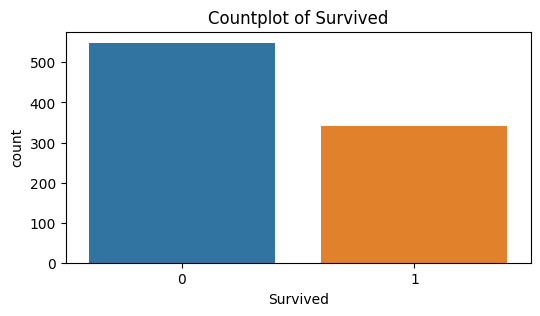

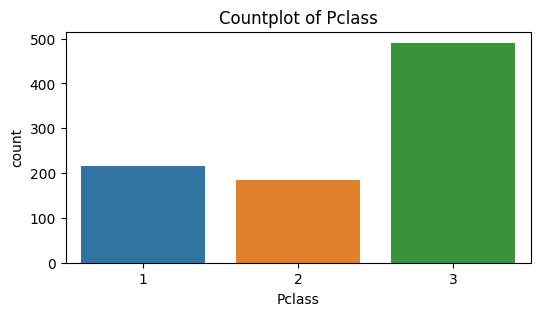

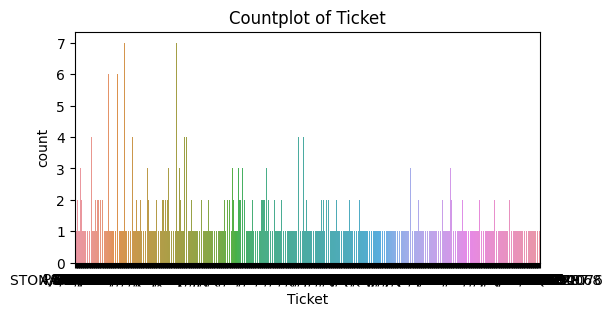

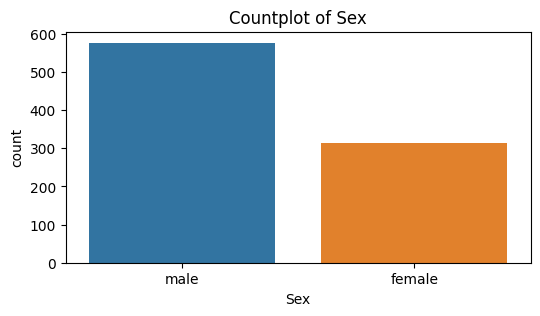

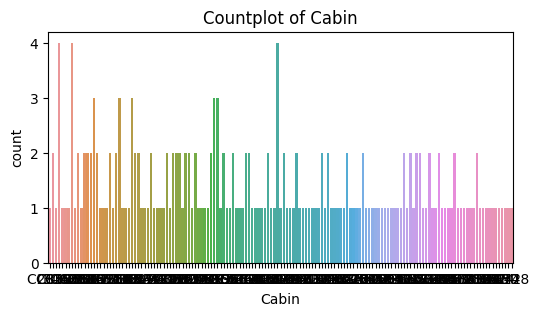

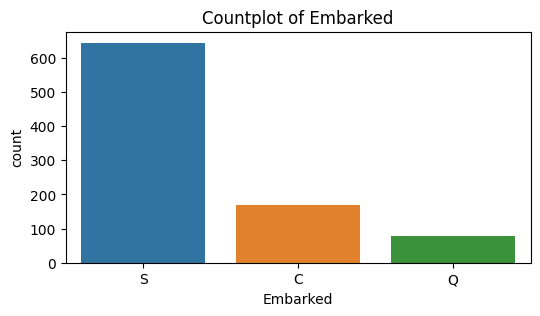

In [13]:
# Plot bar graphs for categorical data

for feature in data_cat.columns:
    plt.figure(figsize=(6,3))
    sns.countplot(x=feature, data=data_cat)
    plt.title(f"Countplot of {feature}")
    plt.show()

### Survival Percentage Calculation

Since we are grouping by 'Survived', which has binary entries (0/1)
The mean for each categorical feature will be the fraction of people who survived in that category.
Multiplying it by 100 we convert the fraction into a percentage.

Example:

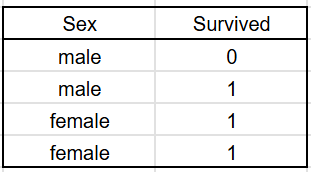

mean(female) = (1+1)/2 = 1

1*100 = 100% survival rate

mean(male) = (0+1)/2 = 0.5

0.5*50 = 50% survival rate

In [14]:
cat_features_filtered = [feat for feat in cat_features if feat != 'Survived']

for feature in cat_features_filtered:
    summary = train_data.groupby(feature)['Survived'].mean()
    print(f"Survival rate by {feature}:\n{summary*100}\n")

Survival rate by Pclass:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Survival rate by Ticket:
Ticket
110152         100.000000
110413          66.666667
110465           0.000000
110564         100.000000
110813         100.000000
                  ...    
W./C. 6608       0.000000
W./C. 6609       0.000000
W.E.P. 5734      0.000000
W/C 14208        0.000000
WE/P 5735       50.000000
Name: Survived, Length: 681, dtype: float64

Survival rate by Sex:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

Survival rate by Cabin:
Cabin
A10      0.0
A14      0.0
A16    100.0
A19      0.0
A20    100.0
       ...  
F33    100.0
F38      0.0
F4     100.0
G6      50.0
T        0.0
Name: Survived, Length: 147, dtype: float64

Survival rate by Embarked:
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64



# Feature Engineering

In [15]:
# new feature - FamilySize
for dataset in [train_data, test_data]:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

# new feature - IsAlone
for dataset in [train_data, test_data]:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

# Data Preprocessing

In [16]:
# fill missing age with median
# to prevent ValueError: Cannot convert float NaN to integer
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# binning age into categories
for dataset in [train_data, test_data]:
    dataset['AgeBin'] = pd.cut(dataset['Age'], bins=[0, 12, 18, 25, 35, 60, 80],
                                labels=[0, 1, 2, 3, 4, 5])
    dataset['AgeBin'] = dataset['AgeBin'].astype(int)

# fill fare with median
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# binning fare into categories
for dataset in [train_data, test_data]:
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4, labels=[0, 1, 2, 3])
    dataset['FareBin'] = dataset['FareBin'].astype(int)

# extracting title from name column
train_data["Title"] = train_data["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
test_data["Title"] = test_data["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

print(train_data["Title"].unique())

# simplifying rare titles
for dataset in [train_data, test_data]:
    dataset["Title"] = dataset["Title"].replace(['Lady', 'Countess','Capt','Col','Don','Dr','Major','Rev',
                                                  'Sir','Jonkheer','Dona'], 'Rare')
    dataset["Title"] = dataset["Title"].replace('Mlle', 'Miss')
    dataset["Title"] = dataset["Title"].replace('Ms', 'Miss')
    dataset["Title"] = dataset["Title"].replace('Mme', 'Mrs')

# encode title
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in [train_data, test_data]:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)

# extract cabin deck from cabin column
for dataset in [train_data, test_data]:
    dataset['CabinDeck'] = dataset['Cabin'].astype(str).str[0]
    dataset['CabinDeck'] = dataset['CabinDeck'].replace('n', 'U')  # replace 'nan' with 'U' for Unknown
    
# encode cabin deck
deck_mapping = {deck: i for i, deck in enumerate(train_data['CabinDeck'].unique())}
train_data['CabinDeck'] = train_data['CabinDeck'].map(deck_mapping)
test_data['CabinDeck'] = test_data['CabinDeck'].map(deck_mapping)
test_data['CabinDeck'] = test_data['CabinDeck'].fillna(0)


# extract ticket prefix from ticket column
import re
def get_prefix(ticket):
    match = re.match(r'([A-Za-z./]+)', ticket)
    if match:
        return match.group(0).replace('.', '').replace('/', '').strip()
    return 'NONE'

for dataset in [train_data, test_data]:
    dataset['TicketPrefix'] = dataset['Ticket'].apply(get_prefix)
    
# encode ticket prefix
prefix_mapping = {prefix: idx for idx, prefix in enumerate(train_data['TicketPrefix'].unique())}
train_data['TicketPrefix'] = train_data['TicketPrefix'].map(prefix_mapping)
test_data['TicketPrefix'] = test_data['TicketPrefix'].map(prefix_mapping)
test_data['TicketPrefix'] = test_data['TicketPrefix'].fillna(0)

# fill embarked with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# encode embarked
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
test_data['Embarked'] = le.transform(test_data['Embarked'])

# encode sex
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.transform(test_data['Sex'])

# one-hot encode Pclass
pclass_dummies_train = pd.get_dummies(train_data['Pclass'], prefix='Pclass')
pclass_dummies_test = pd.get_dummies(test_data['Pclass'], prefix='Pclass')

train_data = pd.concat([train_data, pclass_dummies_train], axis=1)
test_data = pd.concat([test_data, pclass_dummies_test], axis=1)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


/tmp/ipykernel_36/3752318377.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
/tmp/ipykernel_36/3752318377.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

NameError: name 'le' is not defined

In [ ]:
# # fill missing age with median
# train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
# test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# # fill fare with median
# test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Model - KNN

In [ ]:
features = ['Sex', 'Age', 'Fare', 'Embarked', 'Title', 'TicketPrefix',
            'Pclass_1', 'Pclass_2', 'Pclass_3']

X = train_data[features]
y = train_data['Survived']
X_test = test_data[features]

### Standard Scaler

Scales features such that each feature has a mean of 0 and stnadard deviation of 1.

[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html](http://)

### Polynomial Features

It is a transformer that expands input features with products of features up to a given degree. For example, if degree=2:

Adds: x1^2, x2^2, x1x2

By setting interaction_only=True, only interaction (cross) terms like x1x2, x1x3,... not squares (x1^2, x2^2,... etc) are used.

include_bias=False excludes a column of all 1s.

* Polynomial features let linear models learn non-linear relationships.
* Not required for tree-based models.

[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html](http://)

[https://youtu.be/unP3rCfzROk?si=Gk-6Bx85spymDguj](http://)

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
X_test_poly = poly.transform(X_test_scaled)

### Cross-Validation

A method to evaluate how well an ML model performs on unseen data.
* The dataset is divided into 'n' equal splits/folds
* Training and validation is performed 'n' times.
  * Each time 1 fold is used as the validation set and the rest are combined to form the training set.

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

### GridSearchCV

A scikit-learn tool that automates the process of hyperparameter tuning
* Such as n_neighbors for KNN
* Uses cross-validation

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': list(range(5, 16)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # For KNN: 1=Manhattan, 2=Euclidean distance
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
# cv=5 means 5 splits of the dataset for cross-validation
# Judge the results by accuracy
grid.fit(X_poly, y)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

best_knn = grid.best_estimator_
predictions = best_knn.predict(X_test_poly)

In [ ]:
# creating submission file
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})
submission.to_csv("submission.csv", index=False)